<a href="https://colab.research.google.com/github/DevLass/DevLass/blob/main/SegurancaPublicaBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_vitimas = pd.read_excel('indicadoressegurancapublicauf.xlsx', sheet_name='Vítimas')
df_vitimas.head()

,UF,Tipo Crime,Ano,Mês,Sexo da Vítima,Vítimas
0,Acre,Homicídio doloso,2022,janeiro,Feminino,2
1,Acre,Homicídio doloso,2022,janeiro,Masculino,8
2,Acre,Homicídio doloso,2022,janeiro,Sexo NI,0
3,Acre,Homicídio doloso,2022,fevereiro,Feminino,0
4,Acre,Homicídio doloso,2022,fevereiro,Masculino,10


In [8]:
# Quantidade de Crimes por Ano
crimes_por_ano = df_vitimas.groupby('Ano')['Vítimas'].sum()
print(crimes_por_ano)

Ano
2015    51349
2016    54091
2017    59382
2018    51855
2019    42068
2020    44321
2021    41529
2022    40803
Name: Vítimas, dtype: int64


In [9]:
# Crimes por Ano e Sexo
crimes_ano_sexo = df_vitimas.groupby(['Ano', 'Sexo da Vítima'])['Vítimas'].sum()
crimes_ano_sexo = crimes_ano_sexo.unstack()
print(crimes_ano_sexo)

Sexo da Vítima  Feminino  Masculino  Sexo NI
Ano                                         
2015                3763      43999     3587
2016                3885      46756     3450
2017                4690      51666     3026
2018                4356      46615      884
2019                3789      37378      901
2020                3846      39564      911
2021                3649      37353      527
2022                3653      36783      367


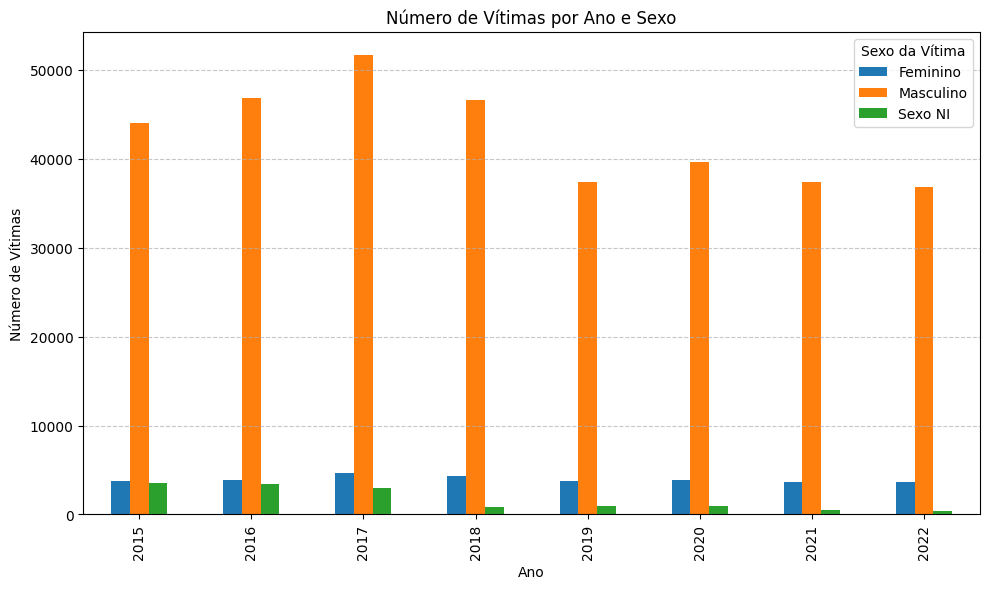

In [14]:
crimes_ano_sexo = df_vitimas.groupby(['Ano', 'Sexo da Vítima'])['Vítimas'].sum().unstack()

crimes_ano_sexo.plot(kind='bar', figsize=(10,6))

plt.title('Número de Vítimas por Ano e Sexo')
plt.xlabel('Ano')
plt.ylabel('Número de Vítimas')
plt.legend(title='Sexo da Vítima')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [18]:
# Crimes por Ano
crimes_tipo_ano = df_vitimas.groupby(['Tipo Crime', 'Ano'])['Vítimas'].sum()
crimes_tipo_ano = crimes_tipo_ano.unstack(fill_value=0)
print(crimes_tipo_ano)


Ano                                   2015   2016   2017   2018   2019   2020  \
Tipo Crime                                                                      
Homicídio doloso                     48673  51093  55950  48965  39646  42269   
Lesão corporal seguida de morte        739    763    970    903    857    741   
Roubo seguido de morte (latrocínio)   1937   2235   2462   1987   1565   1311   

Ano                                   2021   2022  
Tipo Crime                                         
Homicídio doloso                     39608  39029  
Lesão corporal seguida de morte        525    573  
Roubo seguido de morte (latrocínio)   1396   1201  


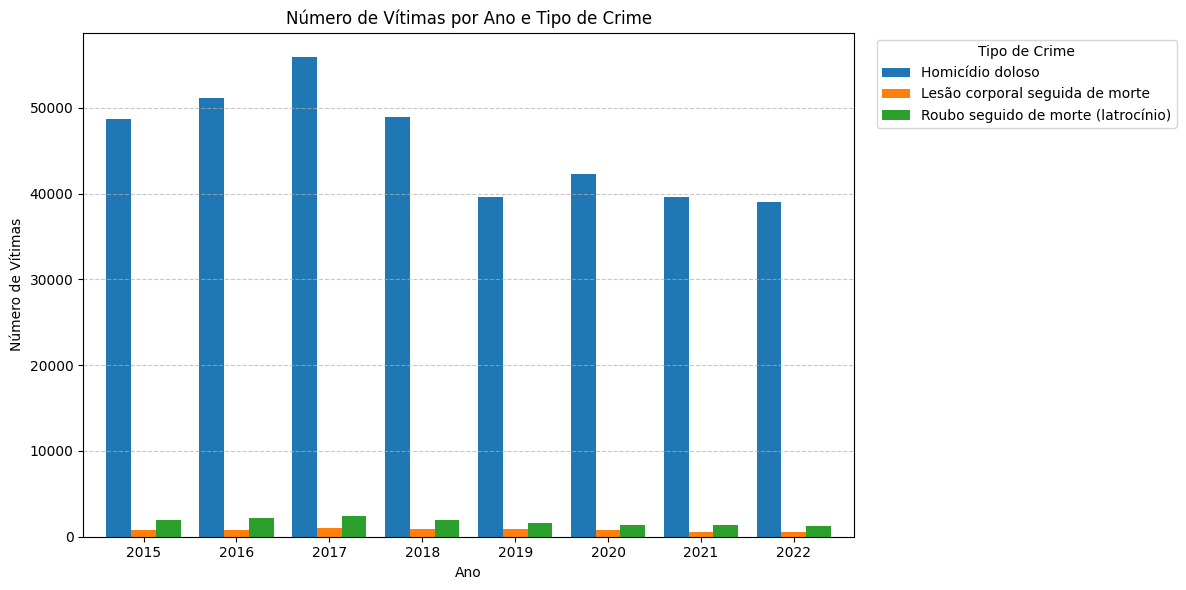

In [23]:

# Grafico x Crimes por Ano
crimes_tipo_ano = (
    df_vitimas
    .groupby(['Tipo Crime', 'Ano'])['Vítimas']
    .sum()
    .unstack(fill_value=0)
)
crimes_ano_tipo = crimes_tipo_ano.T
ax = crimes_ano_tipo.plot(
    kind='bar',
    figsize=(12, 6),
    width=0.8
)
ax.set_title('Número de Vítimas por Ano e Tipo de Crime')
ax.set_xlabel('Ano')
ax.set_ylabel('Número de Vítimas')
ax.set_xticklabels(crimes_ano_tipo.index, rotation=0)
ax.legend(title='Tipo de Crime', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [26]:
# Crimes x Sexo por Ano
crimes_tipo_ano_sexo = df_vitimas.groupby(['Tipo Crime', 'Ano', 'Sexo da Vítima'])['Vítimas'].sum()
crimes_tabela = crimes_tipo_ano_sexo.unstack(['Ano', 'Sexo da Vítima'], fill_value=0)

print(crimes_tabela)


Ano                                     2015                       2016  \
Sexo da Vítima                      Feminino Masculino Sexo NI Feminino   
Tipo Crime                                                                
Homicídio doloso                        3479     41830    3364     3585   
Lesão corporal seguida de morte           97       572      70       92   
Roubo seguido de morte (latrocínio)      187      1597     153      208   

Ano                                                       2017            \
Sexo da Vítima                      Masculino Sexo NI Feminino Masculino   
Tipo Crime                                                                 
Homicídio doloso                        44277    3231     4355     48718   
Lesão corporal seguida de morte           599      72      102       815   
Roubo seguido de morte (latrocínio)      1880     147      233      2133   

Ano                                             2018  ...    2019     2020  \
Sexo da Vítima

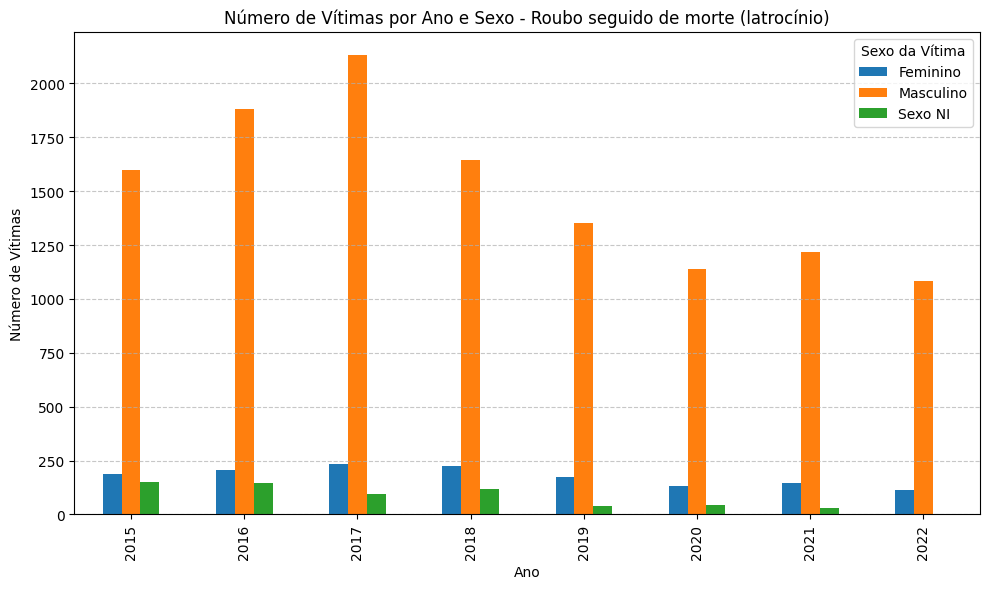

In [24]:
# Filtrar um tipo de crime específico
crime_escolhido = 'Roubo seguido de morte (latrocínio)'
dados_crime = crimes_tipo_ano_sexo.loc[crime_escolhido].unstack(fill_value=0)
dados_crime.plot(kind='bar', figsize=(10,6))
plt.title(f'Número de Vítimas por Ano e Sexo - {crime_escolhido}')
plt.xlabel('Ano')
plt.ylabel('Número de Vítimas')
plt.legend(title='Sexo da Vítima')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [27]:
# Crimes x Estado
vitimas_estado = df_vitimas.groupby('UF')['Vítimas'].sum().sort_values(ascending=False)
print(vitimas_estado)


UF
Bahia                  46731
Rio de Janeiro         34806
Pernambuco             31774
Ceará                  29583
Minas Gerais           26618
Pará                   25453
São Paulo              20678
Rio Grande do Sul      18711
Paraná                 17729
Goiás                  15977
Maranhão               15219
Rio Grande do Norte    12431
Alagoas                11182
Amazonas                9988
Espírito Santo          9641
Paraíba                 9638
Mato Grosso             7907
Sergipe                 7537
Santa Catarina          6600
Piauí                   5532
Mato Grosso do Sul      4406
Distrito Federal        4032
Rondônia                3893
Tocantins               3164
Amapá                   2341
Acre                    2201
Roraima                 1626
Name: Vítimas, dtype: int64


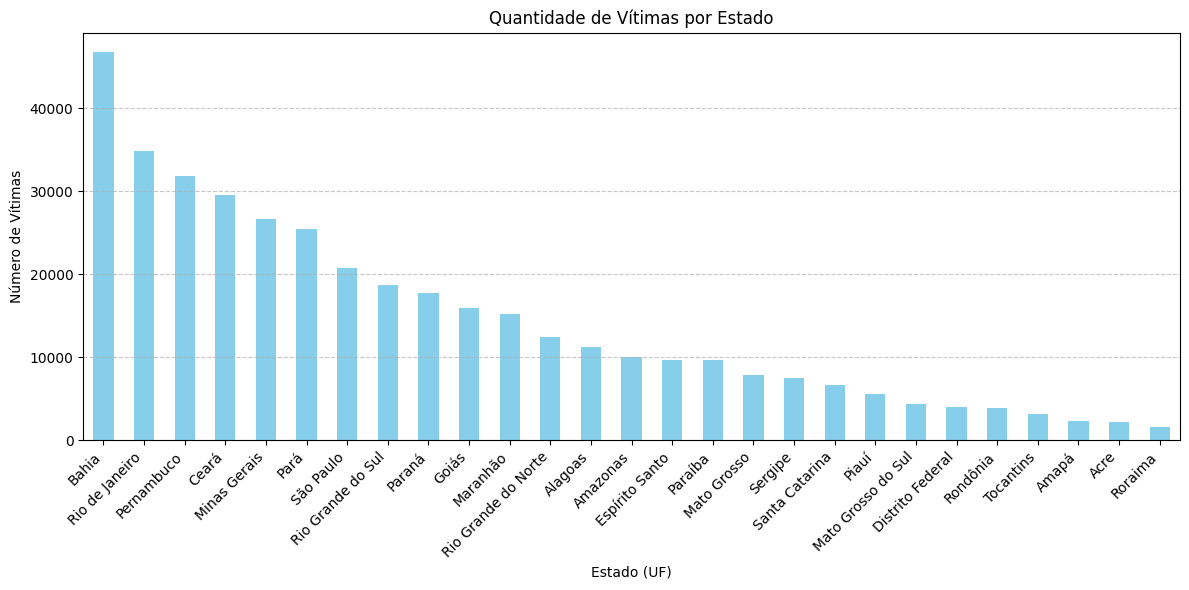

In [28]:
# Gráfico Crimes x Estado
vitimas_estado.plot(kind='bar', figsize=(12,6), color='skyblue')

plt.title('Quantidade de Vítimas por Estado')
plt.xlabel('Estado (UF)')
plt.ylabel('Número de Vítimas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


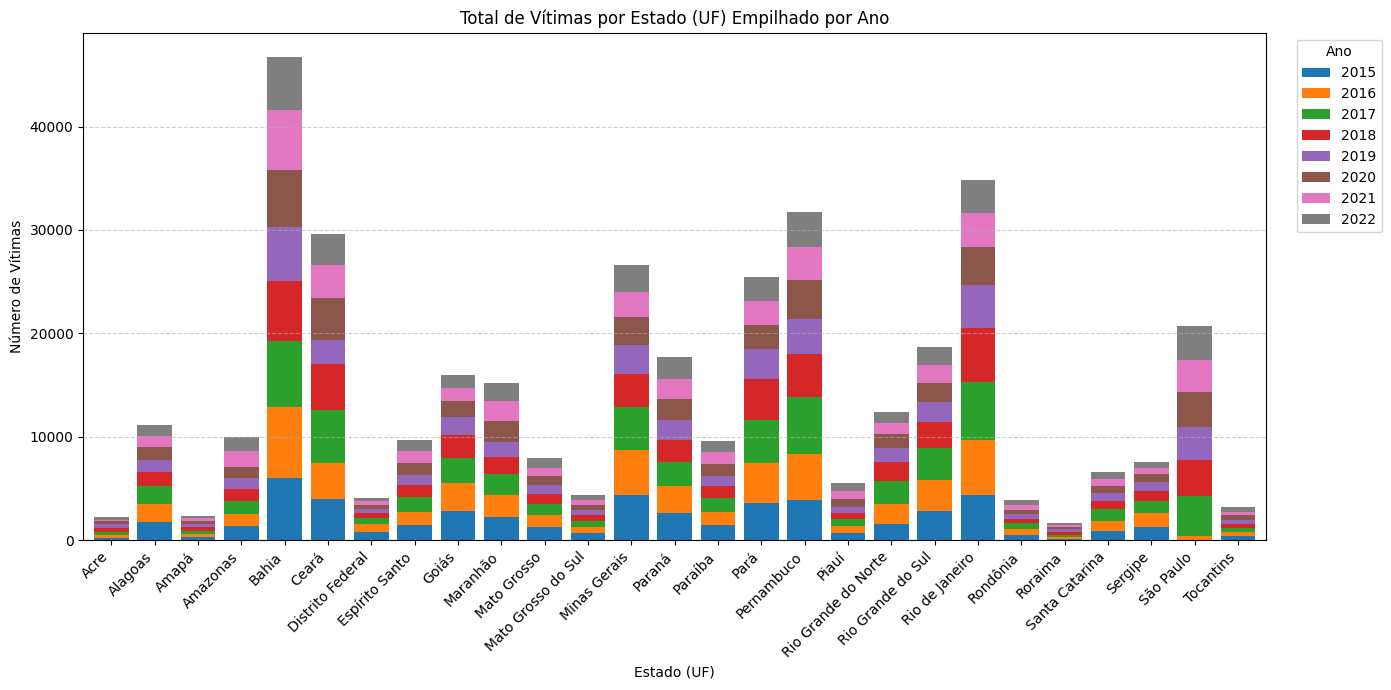

In [29]:
# Crimes x Estado x Ano
vitimas_uf_ano = (
    df_vitimas
    .groupby(['UF', 'Ano'])['Vítimas']
    .sum()
    .unstack(fill_value=0)
)

ax = vitimas_uf_ano.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    width=0.8
)

ax.set_title('Total de Vítimas por Estado (UF) Empilhado por Ano')
ax.set_xlabel('Estado (UF)')
ax.set_ylabel('Número de Vítimas')
ax.set_xticklabels(vitimas_uf_ano.index, rotation=45, ha='right')
ax.legend(title='Ano', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [30]:
# Crimes por Mês
vitimas_mes = (
    df_vitimas
    .groupby('Mês')['Vítimas']
    .sum()
    .reindex([
        'janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho',
        'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro'
    ])  # Garante a ordem correta dos meses
)

print(vitimas_mes)


Mês
janeiro      35232
fevereiro    32140
março        34091
abril        33145
maio         31776
junho        29396
julho        29733
agosto       30294
setembro     30656
outubro      33124
novembro     32233
dezembro     33578
Name: Vítimas, dtype: int64


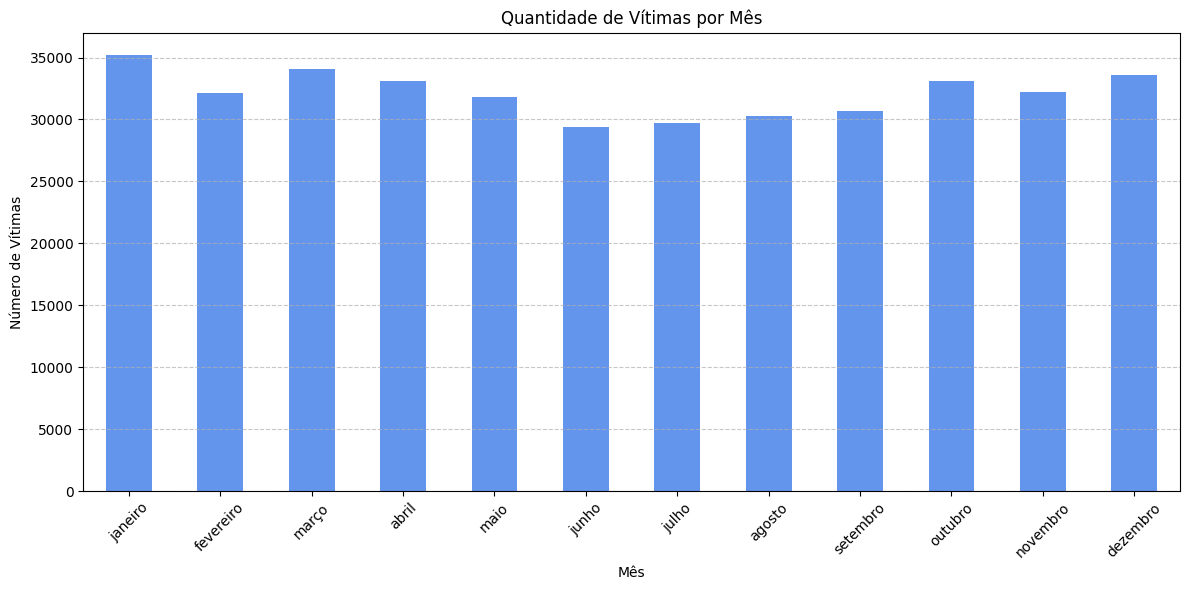

In [31]:
# Gráfico Crimes por Mês
vitimas_mes.plot(
    kind='bar',
    color='cornflowerblue',
    figsize=(12,6)
)

plt.title('Quantidade de Vítimas por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Vítimas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
